# **Mengimpor Library dan Memuat Dataset**

### Penggunaan Library untuk menjalankan semua langkah dalam pembuatan model

### 1. Pandas (`import pandas as pd`)

Pandas digunakan untuk manipulasi data, seperti membaca, mengolah, dan menganalisis data dalam format tabel.

### 2. Matplotlib (`import matplotlib.pyplot as plt`)

Matplotlib digunakan untuk membuat grafik dan visualisasi data dalam bentuk plot 2D.

### 3. Scikit-Learn (sklearn)

Scikit-learn adalah library untuk pembelajaran mesin yang menyediakan berbagai algoritma dan alat untuk klasifikasi, regresi, dan pemrosesan data.

### 3.1 train_test_split (`from sklearn.model_selection import train_test_split`)

Digunakan untuk membagi dataset menjadi data pelatihan dan data pengujian.

### 3.2 RandomForestClassifier (`from sklearn.ensemble import RandomForestClassifier`)

RandomForestClassifier adalah algoritma klasifikasi berbasis ensemble yang membangun banyak pohon keputusan.

### 3.3 XGBClassifier (`from xgboost import XGBClassifier`)

XGBClassifier adalah algoritma klasifikasi berbasis gradient boosting yang sangat efisien dan sering digunakan dalam kompetisi pembelajaran mesin.

### 3.4 accuracy_score dan confusion_matrix (`from sklearn.metrics import accuracy_score, confusion_matrix`)

accuracy_score menghitung akurasi model, sementara confusion_matrix memberikan gambaran tentang prediksi yang benar dan salah.

### 3.5 KNNImputer (`from sklearn.impute import KNNImputer`)

KNNImputer digunakan untuk mengisi nilai yang hilang dalam dataset menggunakan teknik K-Nearest Neighbors.

### 3.6 GridSearchCV (`from sklearn.model_selection import GridSearchCV`)

GridSearchCV digunakan untuk mencari hyperparameter terbaik dengan pencarian grid dan validasi silang.

### 3.7 KNeighborsClassifier (`from sklearn.neighbors import KNeighborsClassifier`)

KNeighborsClassifier adalah algoritma klasifikasi yang menggunakan kedekatan dengan tetangga terdekat untuk menentukan kelas data.

### 3.8 GradientBoostingClassifier (`from sklearn.ensemble import GradientBoostingClassifier`)

GradientBoostingClassifier adalah algoritma berbasis boosting yang membangun model secara bertahap untuk meningkatkan akurasi.

### 4. Seaborn (`import seaborn as sns`)

Seaborn adalah library untuk visualisasi data yang membuat pembuatan grafik statistik lebih mudah dan informatif.


In [31]:
#Mengimpor seluruh library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

### Mengimpor Dataset Titanic

Kode ini mengimpor dataset Titanic dari URL menggunakan Pandas dan menampilkannya.

1. **pd.read_csv()**: Digunakan untuk membaca file CSV dari URL dan memuatnya ke dalam DataFrame.
2. **df**: Menampilkan DataFrame yang berisi data Titanic.

In [32]:
#Mengimpor dataset dan menampilkannya
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Data Understanding

### Menampilkan Informasi Data

Kode ini menggunakan `df.info()` untuk menampilkan informasi mengenai DataFrame.

**df.info()**: Menyediakan informasi ringkas tentang dataset, termasuk jumlah entri, jumlah nilai non-null, tipe data setiap kolom, dan penggunaan memori.

In [33]:
#Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Menemukan Kolom 'Fare' yang Bernilai 0

Kode ini mencari baris dalam dataset yang memiliki nilai 'Fare' (tarif) sama dengan 0 dan menghitung jumlah penumpang tersebut.

- **df[df['Fare'] == 0]**: Menyaring DataFrame untuk menemukan baris di mana kolom 'Fare' bernilai 0.
- **len(zero_fare_rows)**: Menghitung jumlah penumpang dengan tarif 0.

In [34]:
# Menemukan kolom 'Fare' yang bernilai 0
zero_fare_rows = df[df['Fare'] == 0]

print("\nJumlah penumpang dengan fare 0:", len(zero_fare_rows))


Jumlah penumpang dengan fare 0: 15


### Menampilkan Informasi Data Kolom Numerik

Kode ini menggunakan `df.describe()` untuk menampilkan statistik deskriptif dari kolom numerik dalam dataset.

**df.describe()**: Menyediakan ringkasan statistik seperti nilai rata-rata, deviasi standar, nilai minimum, kuartil, dan nilai maksimum untuk kolom numerik.


In [35]:
#Menampilkan informasi data kolom numerik
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Cek Data Duplikat

Kode ini digunakan untuk memeriksa dan menampilkan data duplikat dalam dataset.

- **df.duplicated().sum()**: Menghitung jumlah baris yang merupakan duplikat dalam DataFrame.
- **df[df.duplicated()]**: Menampilkan baris yang merupakan duplikat.

In [36]:
# Cek data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())
print("\nData duplikat:")
print(df[df.duplicated()])


Jumlah data duplikat: 0

Data duplikat:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


# **Pra-Pemrosesan Data**

### Menghapus Kolom dan Mengganti Nilai

Kode ini menghapus kolom yang tidak dibutuhkan dan mengganti nilai 0 dengan `null` pada kolom 'Fare'.

- **df.drop([...], axis=1)**: Menghapus kolom 'PassengerId', 'Name', 'Ticket', dan 'Embarked' dari DataFrame.
- **df['Fare'].replace(0, pd.NA)**: Mengganti semua nilai 0 pada kolom 'Fare' dengan `null` (`pd.NA`).


In [37]:
#Menghapus kolom yang tidak dibutuhkan
df = df.drop(['PassengerId', 'Name', 'Ticket','Embarked'], axis=1)

#Menganti nilai 0 dengan null pada kolom fare

df['Fare'] = df['Fare'].replace(0, pd.NA)

### Mengisi Nilai Kosong pada Kolom "Age" Menggunakan KNN

Kode ini mengisi nilai kosong pada kolom 'Age' dengan menggunakan teknik imputasi berbasis K-Nearest Neighbors (KNN).

1. **KNNImputer** digunakan untuk mengisi nilai kosong pada kolom numerik berdasarkan kedekatan dengan data lainnya.
2. **GridSearchCV** digunakan untuk mencari jumlah tetangga (neighbors) terbaik dengan validasi silang, untuk mendapatkan estimasi terbaik.
3. **best_knn_imputer** adalah model KNN yang terpilih setelah pencarian hyperparameter terbaik.
4. **df_numerical_imputed** adalah DataFrame yang berisi hasil imputasi untuk kolom-kolom numerik.
5. Nilai kosong pada kolom 'Age' di DataFrame asli diisi dengan hasil imputasi yang telah dihitung.


In [38]:
#Mengisi baris kosong pada kolom "Age"
numerical_features = ['Age', 'Pclass', 'SibSp', 'Parch']
df_numerical = df[numerical_features]
knn_imputer = KNNImputer()
param_grid = {'n_neighbors': range(1, 80)}
grid_search = GridSearchCV(knn_imputer, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(df_numerical)

best_knn_imputer = grid_search.best_estimator_

df_numerical_imputed = pd.DataFrame(best_knn_imputer.transform(df_numerical), columns=df_numerical.columns)

df['Age'] = df_numerical_imputed['Age']

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.

### Mengisi Nilai Kosong pada Kolom "Fare" Menggunakan KNN

Kode ini mengisi nilai kosong pada kolom 'Fare' dengan menggunakan imputasi berbasis K-Nearest Neighbors (KNN).

1. **pd.to_numeric()** mengonversi kolom numerik menjadi tipe data numerik dan mengganti nilai yang tidak valid dengan `NaN`.
2. **KNNImputer** digunakan untuk mengisi nilai kosong berdasarkan kedekatan data lainnya.
3. **GridSearchCV** mencari jumlah tetangga (neighbors) terbaik untuk model KNN dengan validasi silang.
4. **best_knn_imputer** menyimpan model KNN yang terpilih berdasarkan pencarian grid.
5. Nilai kosong pada kolom 'Fare' diisi dengan hasil imputasi yang dihitung dan disalin kembali ke DataFrame asli.


In [39]:
#Mengisi baris kosong pada kolom "Fare"
numerical_features = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
df_numerical = df[numerical_features]

for feature in numerical_features:
    df_numerical[feature] = pd.to_numeric(df_numerical[feature], errors='coerce')

knn_imputer = KNNImputer()
param_grid = {'n_neighbors': range(1, 80)}
grid_search = GridSearchCV(knn_imputer, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(df_numerical)

best_knn_imputer = grid_search.best_estimator_
df_numerical_imputed = pd.DataFrame(best_knn_imputer.transform(df_numerical), columns=df_numerical.columns)
df['Fare'] = df_numerical_imputed['Fare']

<ipython-input-39-5daa334791e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical[feature] = pd.to_numeric(df_numerical[feature], errors='coerce')
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarnin

### Mengelompokkan Kolom "Cabin"

Kode ini mengelompokkan nilai pada kolom 'Cabin' ke dalam kategori berdasarkan huruf pertama dari nomor kabin. **Pada bagian ini sulit untuk dilakukan binning sehingga digunakan percabangan.**

1. **categorize_cabin()** adalah fungsi yang mengelompokkan nilai 'Cabin' menjadi tiga kategori: 'Kelas Atas', 'Kelas Menengah', dan 'Kelas Bawah', atau "Tidak Diketahui" jika nilai kosong.
2. **df['Cabin'].apply(categorize_cabin)** menerapkan fungsi `categorize_cabin` pada setiap entri di kolom 'Cabin' untuk mengubahnya menjadi kategori yang sesuai.
3. Hasilnya adalah kolom 'Cabin' yang telah dikelompokkan dalam DataFrame `df`.


In [40]:
#Mengelompokkan kolom Cabin
def categorize_cabin(cabin):
  if pd.isnull(cabin):
    return "Tidak Diketahui"
  elif cabin[0] in ['A', 'B', 'C',]:
    return "Kelas Atas"
  elif cabin[0] in ['D', 'E', 'F']:
    return "Kelas Menengah"
  else:
    return "Kelas Bawah"

df['Cabin'] = df['Cabin'].apply(categorize_cabin)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,Tidak Diketahui
1,1,1,female,38.0,1,0,71.2833,Kelas Atas
2,1,3,female,26.0,0,0,7.9250,Tidak Diketahui
3,1,1,female,35.0,1,0,53.1000,Kelas Atas
4,0,3,male,35.0,0,0,8.0500,Tidak Diketahui
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Tidak Diketahui
887,1,1,female,19.0,0,0,30.0000,Kelas Atas
888,0,3,female,26.0,1,2,23.4500,Tidak Diketahui
889,1,1,male,26.0,0,0,30.0000,Kelas Atas


### Mengelompokkan Nilai pada Kolom "Age"

Kode ini mengelompokkan nilai pada kolom 'Age' ke dalam kategori berdasarkan rentang usia.

1. **pd.cut()** digunakan untuk membagi kolom 'Age' ke dalam kelompok usia berdasarkan rentang yang ditentukan dalam `bins_age`.
2. **bins_age** adalah batasan usia yang membagi data menjadi 5 kategori: "Anak-Anak", "Remaja", "Dewasa", "Tua", dan "Manula".
3. **labels_age** adalah label kategori yang diberikan untuk setiap kelompok usia.
4. Kolom 'Age' dalam DataFrame `df` diubah menjadi kategori berdasarkan rentang usia tersebut.


In [41]:
#Mengelompokkan nilai pada kolom usia
bins_age = [0, 11, 26, 41, 64, 100]
labels_age = ["Anak-Anak", "Remaja", "Dewasa", "Tua", "Manula"]
df['Age'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,Remaja,1,0,7.2500,Tidak Diketahui
1,1,1,female,Dewasa,1,0,71.2833,Kelas Atas
2,1,3,female,Remaja,0,0,7.9250,Tidak Diketahui
3,1,1,female,Dewasa,1,0,53.1000,Kelas Atas
4,0,3,male,Dewasa,0,0,8.0500,Tidak Diketahui
...,...,...,...,...,...,...,...,...
886,0,2,male,Dewasa,0,0,13.0000,Tidak Diketahui
887,1,1,female,Remaja,0,0,30.0000,Kelas Atas
888,0,3,female,Remaja,1,2,23.4500,Tidak Diketahui
889,1,1,male,Remaja,0,0,30.0000,Kelas Atas


### Pengelompokkan Kolom "SibSp" dan "Parch"

Kode ini mengelompokkan nilai pada kolom 'SibSp' dan 'Parch' ke dalam kategori berdasarkan jumlah saudara/istri (SibSp) dan orang tua/anak (Parch) yang dibawa.

1. **pd.cut()** digunakan untuk mengelompokkan data kolom 'SibSp' dan 'Parch' ke dalam kategori berdasarkan rentang yang ditentukan.
2. **bins_sibsp** membagi nilai 'SibSp' menjadi dua kategori: "Tidak Membawa" dan "Membawa" berdasarkan jumlah yang lebih besar dari 0.
3. **bins_parch** membagi nilai 'Parch' menjadi tiga kategori: "Tidak Berkeluarga", "Keluarga Kecil", dan "Keluarga Besar".
4. Kolom 'SibSp' dan 'Parch' diubah menjadi kategori sesuai dengan rentang dan label yang telah ditentukan.


> Tambahkan blockquote



In [42]:
#Pengelompokkan kolom SibSp dan Parch
bins_sibsp = [-1, 0, 10]
labels_sibsp = ["Tidak Membawa", "Membawa"]
df['SibSp'] = pd.cut(df['SibSp'], bins=bins_sibsp, labels=labels_sibsp)

bins_parch = [-1, 0, 3, 10]
labels_parch = ["Tidak Berkeluarga", "Keluarga Kecil", "Keluarga Besar"]
df['Parch'] = pd.cut(df['Parch'], bins=bins_parch, labels=labels_parch)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,Remaja,Membawa,Tidak Berkeluarga,7.2500,Tidak Diketahui
1,1,1,female,Dewasa,Membawa,Tidak Berkeluarga,71.2833,Kelas Atas
2,1,3,female,Remaja,Tidak Membawa,Tidak Berkeluarga,7.9250,Tidak Diketahui
3,1,1,female,Dewasa,Membawa,Tidak Berkeluarga,53.1000,Kelas Atas
4,0,3,male,Dewasa,Tidak Membawa,Tidak Berkeluarga,8.0500,Tidak Diketahui
...,...,...,...,...,...,...,...,...
886,0,2,male,Dewasa,Tidak Membawa,Tidak Berkeluarga,13.0000,Tidak Diketahui
887,1,1,female,Remaja,Tidak Membawa,Tidak Berkeluarga,30.0000,Kelas Atas
888,0,3,female,Remaja,Membawa,Keluarga Kecil,23.4500,Tidak Diketahui
889,1,1,male,Remaja,Tidak Membawa,Tidak Berkeluarga,30.0000,Kelas Atas


### Mengkategorikan Kolom "Fare"

Kode ini mengelompokkan nilai pada kolom 'Fare' (tarif) ke dalam kategori berdasarkan rentang tarif.

1. **pd.cut()** digunakan untuk membagi nilai pada kolom 'Fare' ke dalam kategori sesuai dengan rentang yang ditentukan dalam `bins_fare`.
2. **bins_fare** adalah rentang tarif yang membagi data menjadi empat kategori: "Murah", "Medium", "Mahal", dan "Kelas Khusus".
3. **labels_fare** adalah label kategori yang diberikan untuk setiap rentang tarif.
4. Kolom 'Fare' dalam DataFrame `df` diubah menjadi kategori berdasarkan rentang tarif tersebut.


In [43]:
#Mengkategorikan kolom Fare
bins_fare = [0, 15, 100, 150, 600]
labels_fare = ["Murah", "Medium", "Mahal", "Kelas Khusus"]
df['Fare'] = pd.cut(df['Fare'], bins=bins_fare, labels=labels_fare)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,Remaja,Membawa,Tidak Berkeluarga,Murah,Tidak Diketahui
1,1,1,female,Dewasa,Membawa,Tidak Berkeluarga,Medium,Kelas Atas
2,1,3,female,Remaja,Tidak Membawa,Tidak Berkeluarga,Murah,Tidak Diketahui
3,1,1,female,Dewasa,Membawa,Tidak Berkeluarga,Medium,Kelas Atas
4,0,3,male,Dewasa,Tidak Membawa,Tidak Berkeluarga,Murah,Tidak Diketahui
...,...,...,...,...,...,...,...,...
886,0,2,male,Dewasa,Tidak Membawa,Tidak Berkeluarga,Murah,Tidak Diketahui
887,1,1,female,Remaja,Tidak Membawa,Tidak Berkeluarga,Medium,Kelas Atas
888,0,3,female,Remaja,Membawa,Keluarga Kecil,Medium,Tidak Diketahui
889,1,1,male,Remaja,Tidak Membawa,Tidak Berkeluarga,Medium,Kelas Atas


# **Visualisasi Data**

### Visualisasi Kemunculan Setiap Kategori

Kode ini membuat visualisasi bar chart untuk menunjukkan jumlah kemunculan setiap kategori dalam kolom yang berbeda.

1. **value_counts()** digunakan untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom yang dipilih.
2. **plt.bar()** digunakan untuk membuat grafik batang (bar chart) yang menunjukkan jumlah kemunculan kategori di setiap kolom.
3. Grafik dihasilkan untuk kolom-kolom seperti 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', dan 'Cabin'.
4. **plt.tight_layout()** memastikan tata letak grafik rapi dan **plt.xticks(rotation=45)** memutar label sumbu X untuk keterbacaan yang lebih baik.
5. Setiap grafik ditampilkan menggunakan **plt.show()**.


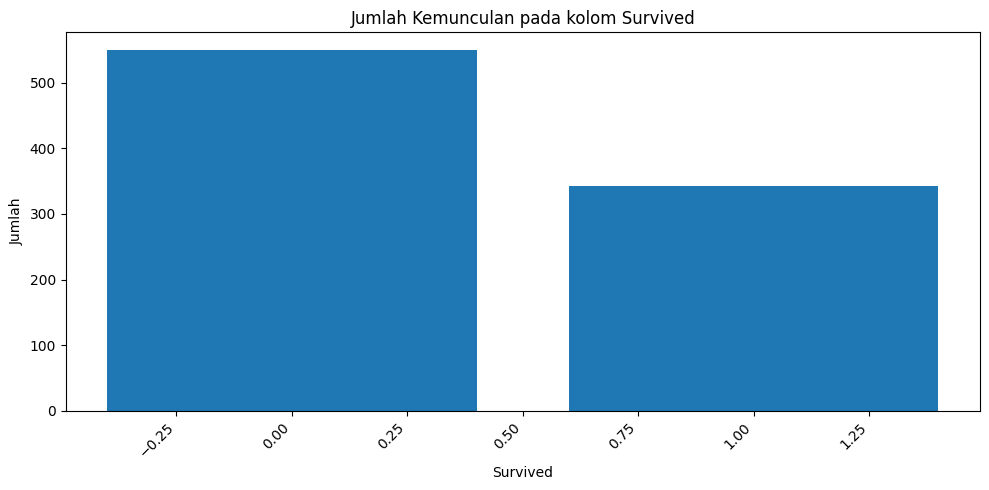

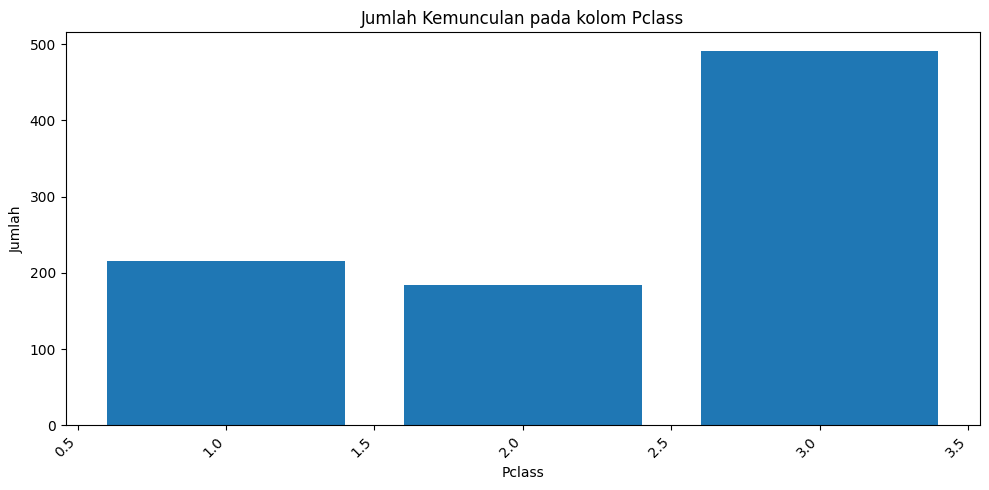

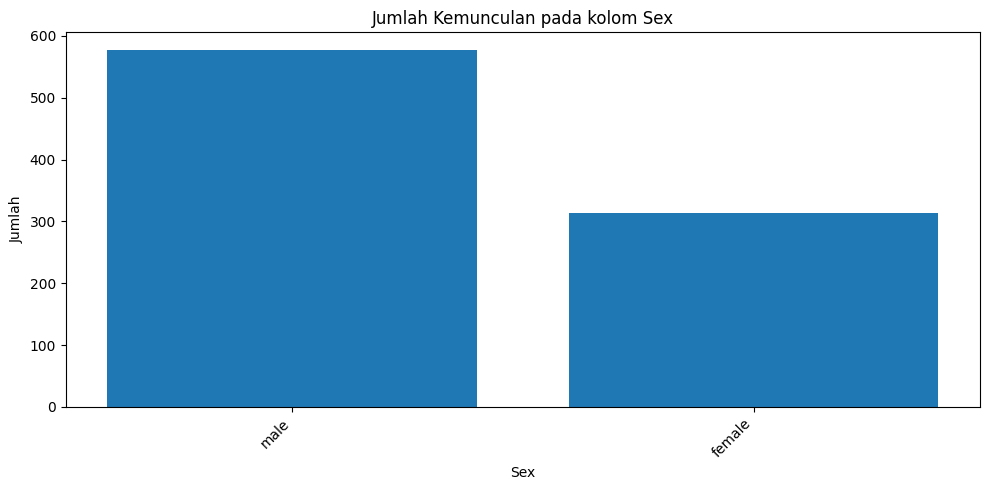

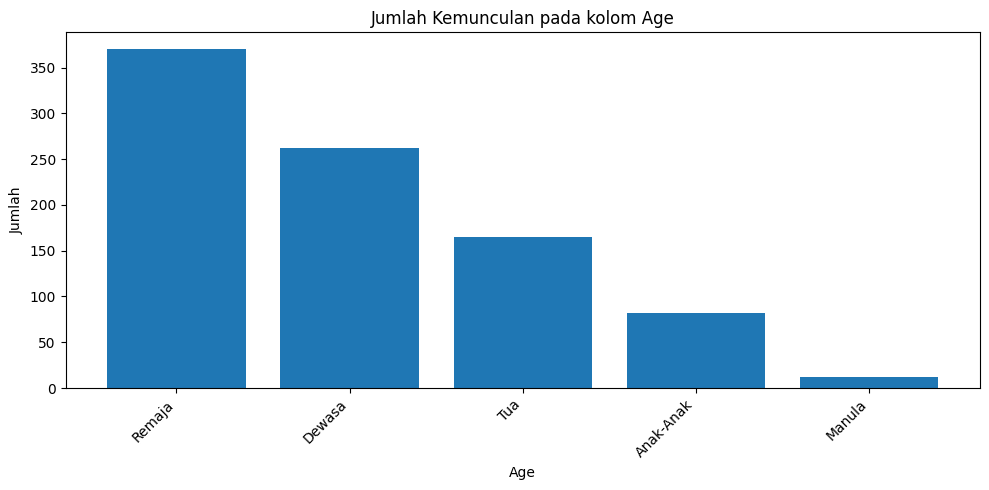

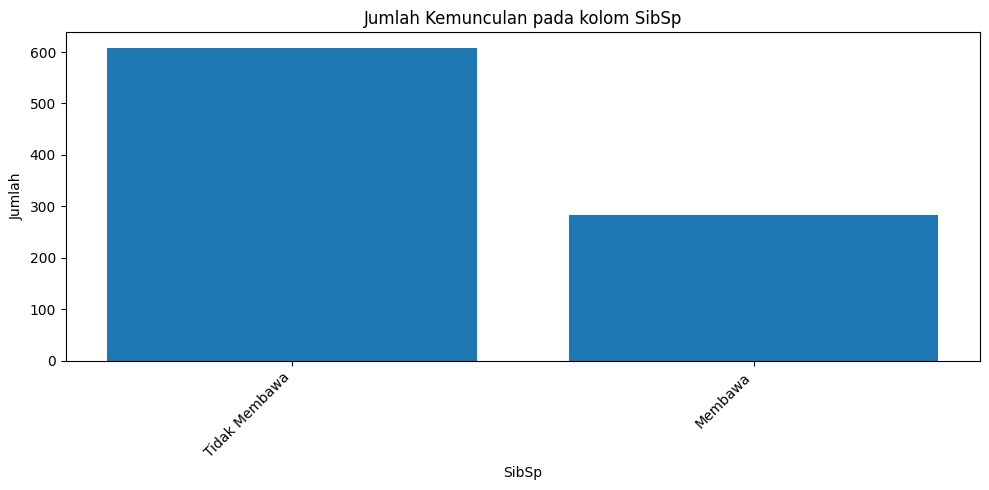

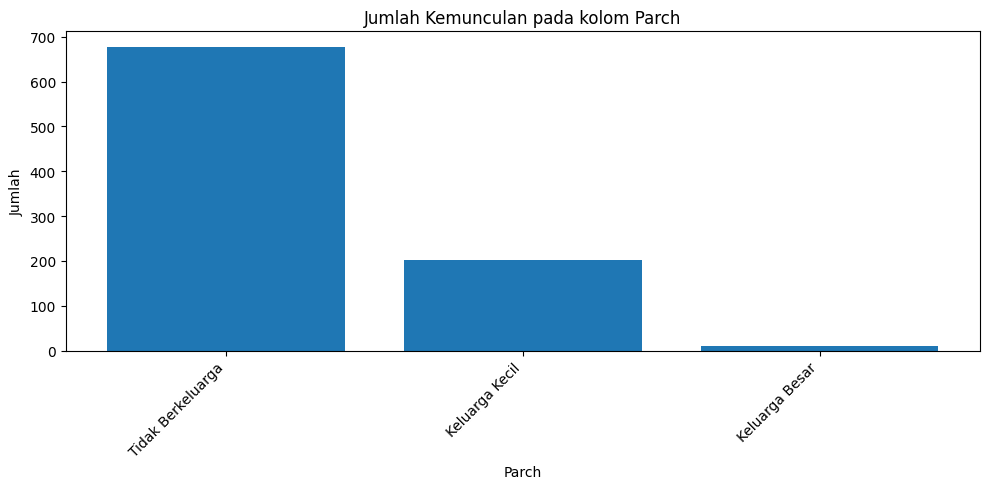

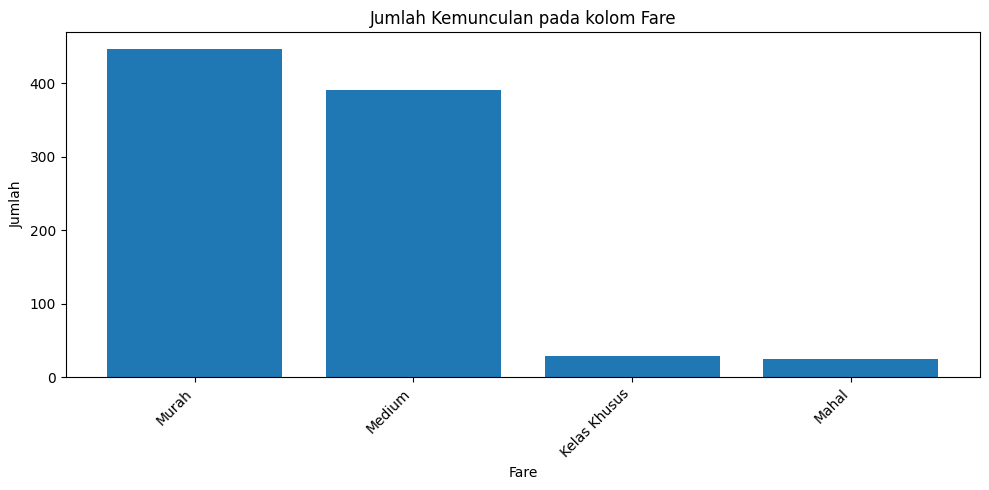

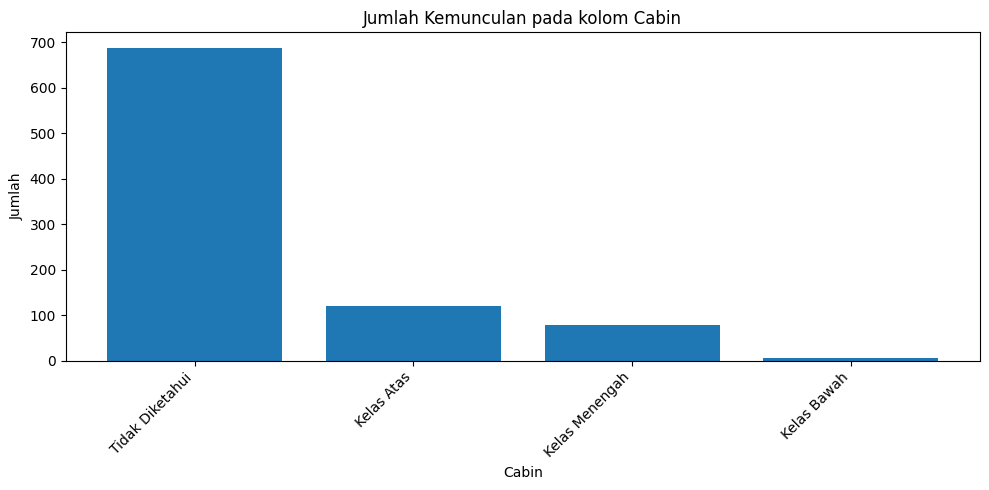

In [44]:
# Membuat visualisasi terhadap kemunculan setiap kategori
column_counts = {}
for column in ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']:
  column_counts[column] = df[column].value_counts()

for column, counts in column_counts.items():
  plt.figure(figsize=(10, 5))
  plt.bar(counts.index, counts.values)
  plt.title(f'Jumlah Kemunculan pada kolom {column}')
  plt.xlabel(column)
  plt.ylabel('Jumlah')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

# **Pelatihan Model dan Evaluasi**

### Encoding Kolom-Kolom Non-Numerik

Kode ini melakukan encoding pada kolom non-numerik untuk mengubah nilai kategorikal menjadi angka.

1. **LabelEncoder** digunakan untuk mengubah nilai kategorikal dalam kolom 'Sex', 'Cabin', 'Age', 'SibSp', 'Parch', dan 'Fare' menjadi representasi numerik.
2. **fit_transform()** menerapkan encoding pada setiap kolom, menggantikan nilai asli dengan angka yang sesuai.
3. Kolom-kolom yang telah di-encode disimpan kembali dalam DataFrame `df`.
4. Proses ini memungkinkan kolom kategorikal untuk digunakan dalam model pembelajaran mesin.


In [45]:
# Encoding kolom-kolom non-numerik
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ['Sex', 'Cabin', 'Age', 'SibSp', 'Parch', 'Fare']:
    df[column] = label_encoder.fit_transform(df[column])

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,1,3,0,2,3,3
1,1,1,0,1,0,2,2,0
2,1,3,0,3,1,2,3,3
3,1,1,0,1,0,2,2,0
4,0,3,1,1,1,2,3,3
...,...,...,...,...,...,...,...,...
886,0,2,1,1,1,2,3,3
887,1,1,0,3,1,2,2,0
888,0,3,0,3,0,1,2,3
889,1,1,1,3,1,2,2,0


### Mendefinisikan Fitur dan Target serta Membagi Data

Kode ini mendefinisikan fitur (X) dan target (y) serta membagi data menjadi data latih dan data uji.

1. **X = df.drop('Survived', axis=1)**: Kolom 'Survived' dipisahkan sebagai target, sementara kolom lainnya dijadikan fitur (X).
2. **y = df['Survived']**: Kolom 'Survived' digunakan sebagai target yang ingin diprediksi.
3. **train_test_split()** membagi data menjadi data latih (80%) dan data uji (20%) dengan parameter `test_size=0.2`.
4. **random_state=42** memastikan hasil pembagian data yang konsisten setiap kali kode dijalankan.


In [46]:
#Mendefinisikan fitur dan target serta membagi data menjadi data latih dan data uji
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model K-NN dengan Pencarian Tetangga Terdekat yang Menghasilkan Akurasi Tertinggi

Kode ini melatih model K-Nearest Neighbors (K-NN) dengan berbagai nilai k untuk menemukan nilai k yang memberikan akurasi terbaik.

1. **Mencari Nilai k Terbaik**: Model K-NN dilatih untuk setiap nilai k antara 1 hingga 50. Akurasi dihitung dengan **accuracy_score** untuk setiap nilai k, dan hasilnya disimpan dalam **accuracy_scores**.
2. **Plotting Akurasi vs. k**: Akurasi untuk setiap nilai k diplot untuk melihat hubungan antara jumlah tetangga dan akurasi model.
3. **Menemukan Best k**: Nilai k yang menghasilkan akurasi tertinggi dipilih dan dicetak sebagai **best_k**.
4. **Model dengan k Terbaik**: Model K-NN dilatih ulang dengan nilai k terbaik dan diuji menggunakan data uji. Akurasi model terbaik dicetak.
5. **Confusion Matrix**: Matriks kebingungannya divisualisasikan menggunakan heatmap untuk mengevaluasi kinerja model pada data uji.


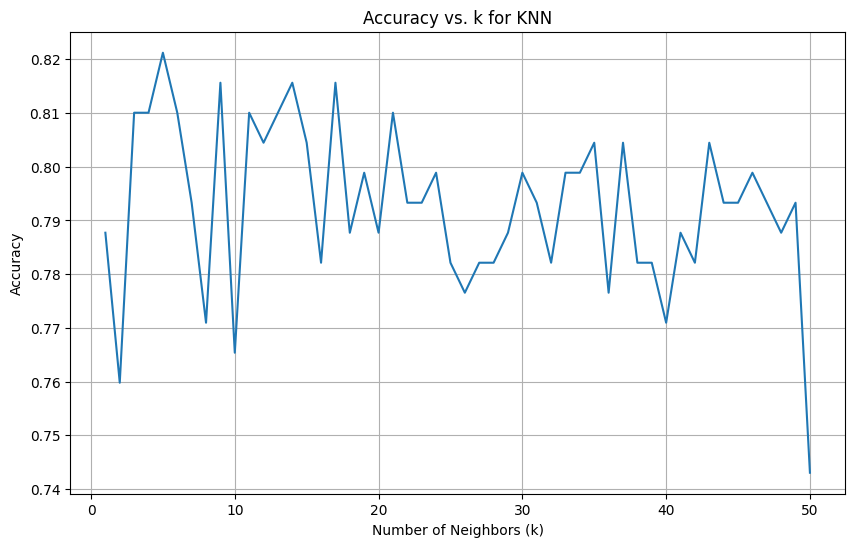

Best k value: 5
Accuracy with best k: 0.8212290502793296


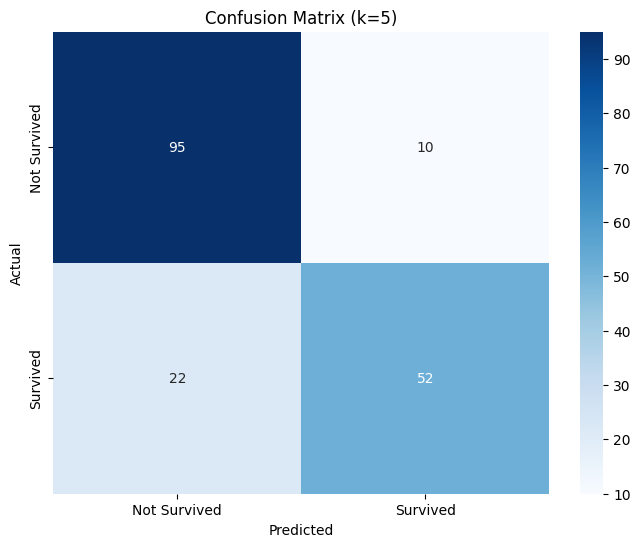

In [47]:
#Model K-NN dengan pencarian tetangga terdekat yang menghasilkan akurasi paling tinggi

accuracy_scores = []
k_values = list(range(1, 51))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for KNN')
plt.grid(True)
plt.show()

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Best k value: {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Accuracy with best k: {best_accuracy}")

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (k={best_k})')
plt.show()

### Feature Importance untuk KNN

Kode ini menggunakan teknik **permutation importance** untuk menilai pentingnya fitur dalam model K-Nearest Neighbors (KNN).

1. **permutation_importance()**: Mengukur pentingnya setiap fitur dengan mengacak nilai fitur dan menghitung penurunan akurasi model. Fungsi ini diulang 10 kali (`n_repeats=10`) untuk stabilitas hasil.
2. **importances_mean**: Mengambil nilai rata-rata penurunan akurasi dari setiap fitur sebagai indikator pentingnya fitur tersebut.
3. **DataFrame**: Hasilnya disusun dalam DataFrame dengan kolom 'Feature' dan 'Importance', kemudian diurutkan berdasarkan nilai pentingnya.
4. **Plotting**: Menggunakan **sns.barplot()** untuk menggambarkan pentingnya setiap fitur dalam model KNN, dengan fitur yang lebih penting diletakkan di atas.
5. **Visualisasi**: Grafik batang menampilkan fitur dengan nilai **importance** tertinggi, memberikan wawasan tentang kontribusi masing-masing fitur terhadap prediksi model.


  Feature  Importance
1     Sex    0.202235
0  Pclass    0.050838
2     Age    0.047486
6   Cabin    0.028492
3   SibSp    0.010056
4   Parch    0.006704
5    Fare   -0.006145


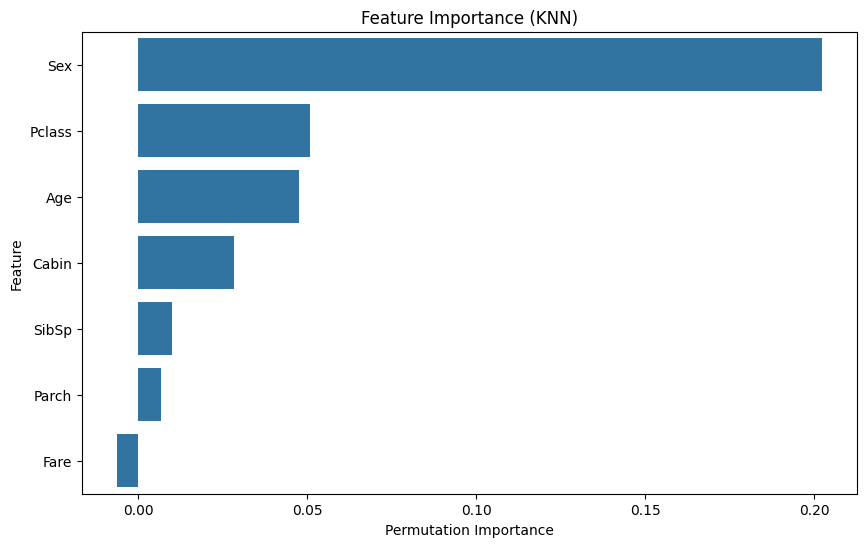

In [48]:
# Feature Importance untuk KNN
import numpy as np
from sklearn.inspection import permutation_importance

result = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (KNN)')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.show()

### Model Random Forest Classifier

Kode ini melatih model Random Forest Classifier dan mengevaluasinya menggunakan data uji.

1. **RandomForestClassifier** digunakan untuk membuat model klasifikasi dengan 100 pohon keputusan (estimators) dan `random_state=42` untuk memastikan hasil yang konsisten.
2. **fit()** melatih model menggunakan data latih (`X_train` dan `y_train`).
3. **predict()** menghasilkan prediksi untuk data uji (`X_test`).
4. **accuracy_score()** menghitung akurasi model berdasarkan perbandingan antara prediksi dan nilai sebenarnya (`y_test`).
5. **confusion_matrix()** menghasilkan matriks kebingungannya untuk mengevaluasi kinerja model dalam mengklasifikasikan data uji.
6. Hasil akurasi dan matriks kebingungannya dicetak untuk analisis lebih lanjut.


In [49]:
#Model Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7932960893854749
Confusion Matrix:
 [[90 15]
 [22 52]]


### Feature Importance untuk Random Forest

Kode ini menghitung dan memvisualisasikan pentingnya fitur dalam model Random Forest.

1. **feature_importances_** mengambil skor pentingnya fitur dari model Random Forest yang telah dilatih.
2. **importance_df** adalah DataFrame yang menyimpan nama fitur dan nilai pentingnya, diurutkan dari yang paling penting.
3. **plt.barh()** digunakan untuk membuat visualisasi horizontal bar chart yang menunjukkan peringkat pentingnya fitur.
4. **plt.xlabel()** dan **plt.ylabel()** memberi label pada sumbu X dan Y untuk menjelaskan grafik.
5. Hasilnya adalah grafik batang yang menggambarkan kontribusi masing-masing fitur terhadap model Random Forest.


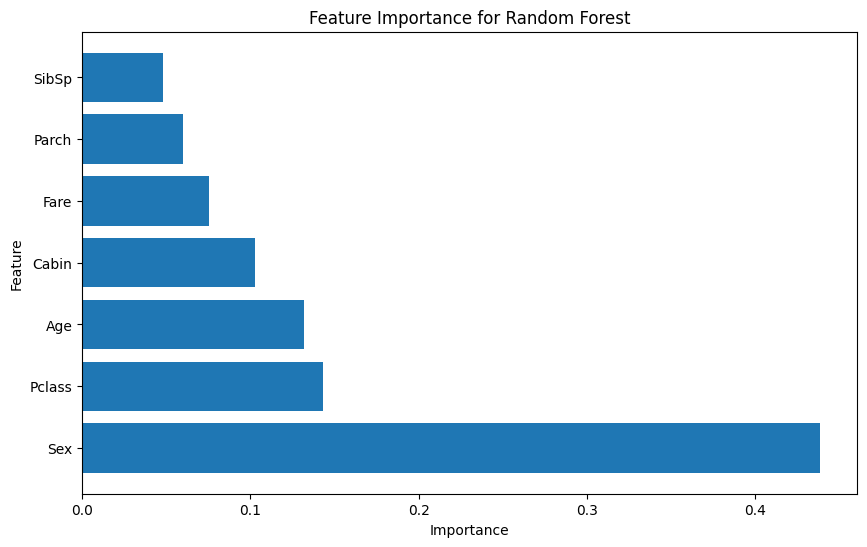

In [50]:
# Feature Importance untuk Random Forest
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest")
plt.show()

### Model Random Forest Classifier dengan Pencarian Parameter Terbaik

Kode ini menggunakan GridSearchCV untuk mencari parameter terbaik untuk model Random Forest Classifier.

1. **param_grid** mendefinisikan grid pencarian untuk parameter model, seperti `n_estimators`, `max_depth`, `min_samples_split`, dan `min_samples_leaf`.
2. **GridSearchCV** digunakan untuk mencari kombinasi parameter terbaik dengan validasi silang (cv=5) dan skor akurasi sebagai metrik evaluasi.
3. **grid_search.fit()** melatih model dengan berbagai kombinasi parameter dan memilih parameter yang memberikan hasil terbaik.
4. **best_estimator_** menyimpan model dengan parameter terbaik yang ditemukan oleh GridSearchCV.
5. **y_pred** dihasilkan menggunakan model terbaik pada data uji, dan akurasi serta matriks kebingungannya dihitung dan dicetak.


In [51]:
#Model Random Forest Classifier denga pencarian parameter terbaik
param_grid = {
    'n_estimators': [80, 200, 500, 800, 1000],
    'max_depth': [12, 15, 18, 20],
    'min_samples_split': [2, 10, 15, 17],
    'min_samples_leaf': [1, 3, 10, 15]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=10)

grid_search.fit(X_train, y_train)

best_rf_classifier = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Best Parameters: {'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 80}
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[95 10]
 [24 50]]


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Feature Importances untuk Best Random Forest Classifier

Kode ini menghitung dan memvisualisasikan pentingnya fitur dalam model Random Forest dengan parameter terbaik yang telah ditemukan.

1. **feature_importances_** mengambil nilai pentingnya fitur dari model Random Forest terbaik (`best_rf_classifier`).
2. **importance_df** adalah DataFrame yang menyimpan fitur dan tingkat pentingnya, diurutkan dari yang paling penting.
3. **plt.barh()** digunakan untuk membuat visualisasi horizontal bar chart yang menunjukkan peringkat pentingnya fitur.
4. **plt.xlabel()** dan **plt.ylabel()** memberi label pada sumbu X dan Y untuk menjelaskan grafik.
5. Hasilnya adalah tabel dan grafik batang yang menggambarkan kontribusi masing-masing fitur terhadap model Random Forest terbaik.


Most Important Features:
  Feature  Importance
1     Sex    0.547537
0  Pclass    0.157769
6   Cabin    0.089233
2     Age    0.077879
5    Fare    0.049658
4   Parch    0.041558
3   SibSp    0.036367


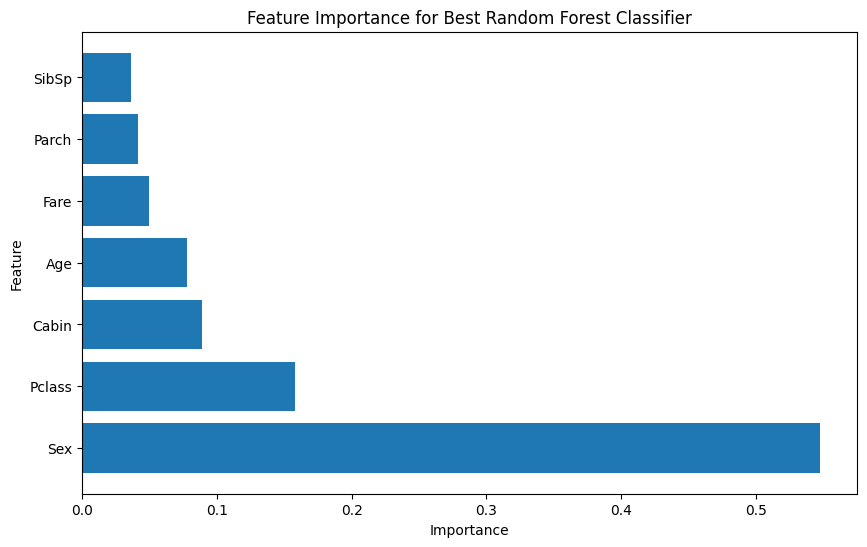

In [52]:
# Feature importances untuk Best Random Forest Classifier
feature_importances = best_rf_classifier.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Most Important Features:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Best Random Forest Classifier")
plt.show()

### Model XGBoost Classifier

Kode ini melatih model XGBoost Classifier dan mengevaluasinya menggunakan data uji.

1. **XGBClassifier** digunakan untuk membuat model klasifikasi XGBoost dengan `random_state=42` untuk hasil yang konsisten.
2. **fit()** melatih model dengan data latih (`X_train` dan `y_train`).
3. **predict()** menghasilkan prediksi untuk data uji (`X_test`).
4. **accuracy_score()** menghitung akurasi model berdasarkan perbandingan antara prediksi dan nilai sebenarnya (`y_test`).
5. **confusion_matrix()** menghasilkan matriks kebingungannya untuk mengevaluasi kinerja model dalam mengklasifikasikan data uji.
6. Hasil akurasi dan matriks kebingungannya dicetak untuk analisis lebih lanjut.


In [53]:
#Model XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7877094972067039
Confusion Matrix:
 [[90 15]
 [23 51]]


### Feature Importance untuk XGBoost

Kode ini menghitung dan memvisualisasikan pentingnya fitur dalam model XGBoost.

1. **feature_importances_** mengambil nilai pentingnya fitur dari model XGBoost yang telah dilatih (`xgb_classifier`).
2. **importance_df** adalah DataFrame yang menyimpan fitur dan tingkat pentingnya, diurutkan berdasarkan nilai pentingnya.
3. **plt.barh()** digunakan untuk membuat visualisasi horizontal bar chart yang menunjukkan peringkat pentingnya fitur.
4. **plt.xlabel()** dan **plt.ylabel()** memberi label pada sumbu X dan Y untuk menjelaskan grafik.
5. Hasilnya adalah tabel dan grafik batang yang menggambarkan kontribusi masing-masing fitur terhadap model XGBoost.


Most Important Features:
  Feature  Importance
1     Sex    0.600747
0  Pclass    0.183086
6   Cabin    0.070985
2     Age    0.041997
4   Parch    0.040503
3   SibSp    0.031506
5    Fare    0.031176


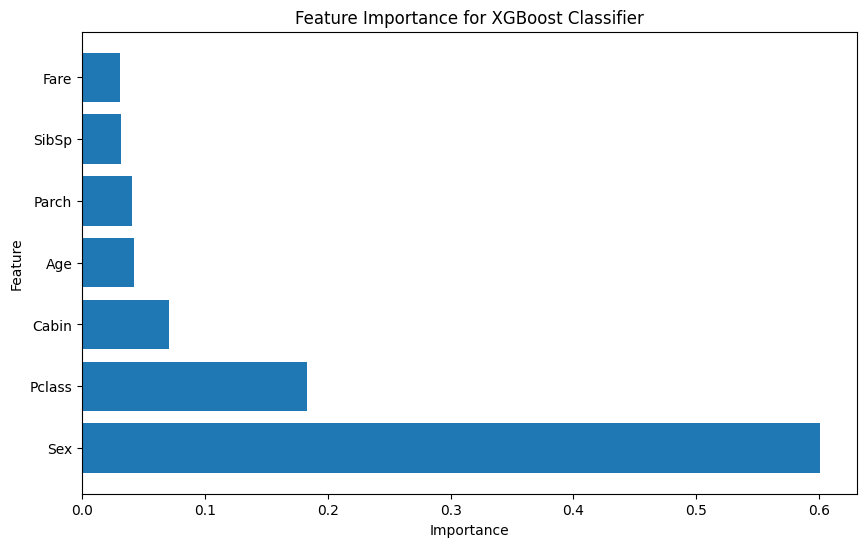

In [54]:
# Feature Importance untuk XGBoost
feature_importances = xgb_classifier.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Most Important Features:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for XGBoost Classifier")
plt.show()

### Tuning Parameter XGBoost

Kode ini menggunakan GridSearchCV untuk mencari kombinasi parameter terbaik untuk model XGBoost.

1. **param_grid_xgb** mendefinisikan grid pencarian untuk parameter XGBoost seperti `learning_rate`, `n_estimators`, `max_depth`, `subsample`, dan `colsample_bytree`.
2. **GridSearchCV** digunakan untuk mencari kombinasi parameter terbaik dengan validasi silang (cv=5) dan skor akurasi sebagai metrik evaluasi.
3. **grid_search_xgb.fit()** melatih model dengan berbagai kombinasi parameter dan memilih parameter yang memberikan hasil terbaik.
4. **best_estimator_** menyimpan model XGBoost dengan parameter terbaik yang ditemukan oleh GridSearchCV.
5. **y_pred_xgb** menghasilkan prediksi menggunakan model terbaik pada data uji, dan akurasi serta matriks kebingungannya dihitung dan dicetak.


In [55]:
#Tuning parameter XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500, 800, 1000],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb,
                               cv=5, scoring='accuracy', n_jobs=10)

grid_search_xgb.fit(X_train, y_train)

best_xgb_classifier = grid_search_xgb.best_estimator_

print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

y_pred_xgb = best_xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Confusion Matrix:\n", conf_matrix_xgb)

Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800, 'subsample': 0.8}
XGBoost Accuracy: 0.8044692737430168
XGBoost Confusion Matrix:
 [[94 11]
 [24 50]]


### Feature Importance untuk Best XGBoost

Kode ini menghitung dan memvisualisasikan pentingnya fitur dalam model XGBoost terbaik yang telah ditemukan setelah pencarian parameter.

1. **feature_importances_** mengambil nilai pentingnya fitur dari model XGBoost terbaik (`best_xgb_classifier`).
2. **importance_df** adalah DataFrame yang menyimpan fitur dan tingkat pentingnya, diurutkan berdasarkan nilai pentingnya.
3. **plt.barh()** digunakan untuk membuat visualisasi horizontal bar chart yang menunjukkan kontribusi setiap fitur terhadap model XGBoost terbaik.
4. **plt.xlabel()** dan **plt.ylabel()** memberi label pada sumbu X dan Y untuk menjelaskan grafik.
5. Hasilnya adalah tabel dan grafik batang yang menggambarkan peringkat pentingnya fitur pada model XGBoost yang telah disesuaikan dengan parameter terbaik.


Most Important Features for Best XGBoost Classifier:
  Feature  Importance
1     Sex    0.581017
0  Pclass    0.164146
6   Cabin    0.074630
2     Age    0.061011
4   Parch    0.045879
3   SibSp    0.038542
5    Fare    0.034774


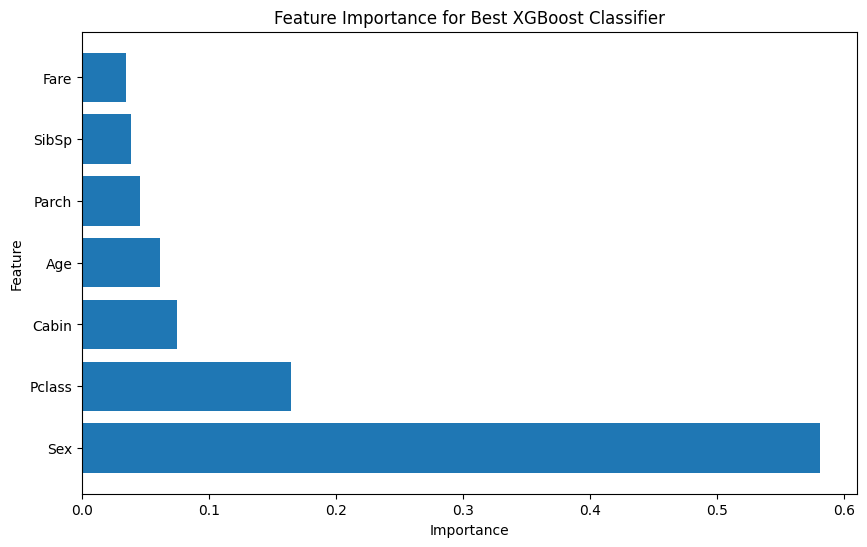

In [56]:
# Feature Importance untuk Best XGBoost
feature_importances = best_xgb_classifier.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Most Important Features for Best XGBoost Classifier:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Best XGBoost Classifier")
plt.show()

### Model Gradient Boosting Classifier

Kode ini melatih dan mengevaluasi model Gradient Boosting Classifier.

1. **GradientBoostingClassifier** digunakan untuk membuat model klasifikasi dengan parameter default dan `random_state=42` untuk hasil yang konsisten.
2. **fit()** melatih model menggunakan data latih (`X_train` dan `y_train`).
3. **predict()** menghasilkan prediksi untuk data uji (`X_test`).
4. **accuracy_score()** menghitung akurasi model berdasarkan perbandingan antara prediksi dan nilai sebenarnya (`y_test`).
5. **confusion_matrix()** menghasilkan matriks kebingungannya untuk mengevaluasi kinerja model dalam mengklasifikasikan data uji.
6. Hasil akurasi dan matriks kebingungannya dicetak untuk analisis lebih lanjut.


In [57]:
#Model Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Gradient Boosting Accuracy:", accuracy)
print("Gradient Boosting Confusion Matrix:\n", conf_matrix)

Gradient Boosting Accuracy: 0.7988826815642458
Gradient Boosting Confusion Matrix:
 [[94 11]
 [25 49]]


### Model Gradient Boosting Classifier

Kode ini melatih dan mengevaluasi model Gradient Boosting Classifier.

1. **GradientBoostingClassifier** digunakan untuk membuat model klasifikasi dengan parameter default dan `random_state=42` untuk hasil yang konsisten.
2. **fit()** melatih model menggunakan data latih (`X_train` dan `y_train`).
3. **predict()** menghasilkan prediksi untuk data uji (`X_test`).
4. **accuracy_score()** menghitung akurasi model berdasarkan perbandingan antara prediksi dan nilai sebenarnya (`y_test`).
5. **confusion_matrix()** menghasilkan matriks kebingungannya untuk mengevaluasi kinerja model dalam mengklasifikasikan data uji.
6. Hasil akurasi dan matriks kebingungannya dicetak untuk analisis lebih lanjut.


Most Important Features for Gradient Boosting Classifier:
  Feature  Importance
1     Sex    0.583174
0  Pclass    0.187351
2     Age    0.079894
6   Cabin    0.073120
5    Fare    0.030966
3   SibSp    0.024309
4   Parch    0.021187


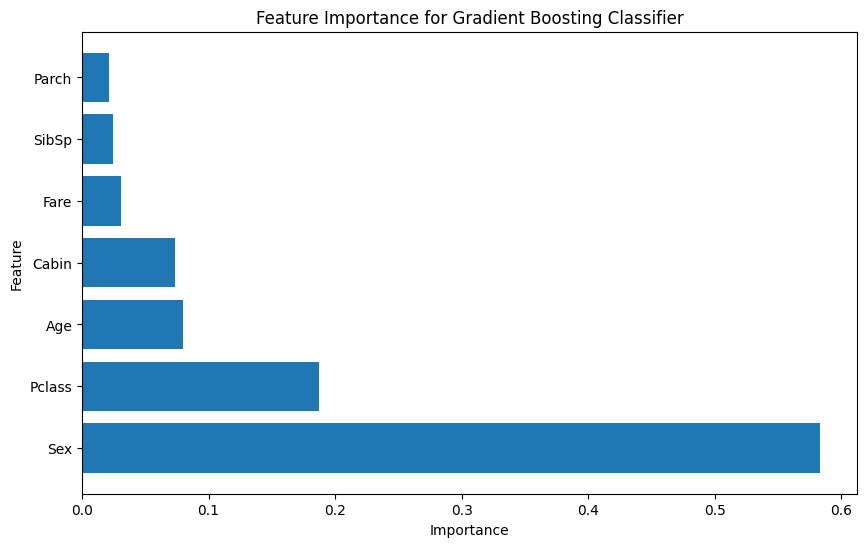

In [58]:
# Feature Importance untuk Gradient Boosting
feature_importances = gb_classifier.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Most Important Features for Gradient Boosting Classifier:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Gradient Boosting Classifier")
plt.show()

### Tuning Parameter Gradient Boosting

Kode ini menggunakan GridSearchCV untuk mencari parameter terbaik untuk model Gradient Boosting.

1. **param_grid_gb** mendefinisikan grid pencarian untuk parameter Gradient Boosting seperti `learning_rate`, `n_estimators`, `max_depth`, dan `subsample`.
2. **GridSearchCV** digunakan untuk mencari kombinasi parameter terbaik dengan validasi silang (cv=5) dan skor akurasi sebagai metrik evaluasi.
3. **grid_search_gb.fit()** melatih model dengan berbagai kombinasi parameter dan memilih parameter yang memberikan hasil terbaik.
4. **best_estimator_** menyimpan model Gradient Boosting terbaik yang ditemukan oleh GridSearchCV.
5. **y_pred_gb** menghasilkan prediksi menggunakan model terbaik pada data uji, dan akurasi serta matriks kebingungannya dihitung dan dicetak.


In [59]:
#Tuning parameter Gradient Boosting
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500, 700, 800, 1000, 1500, 1800, 2000],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb,
                              cv=5, scoring='accuracy', n_jobs=5)

grid_search_gb.fit(X_train, y_train)

best_gb_classifier = grid_search_gb.best_estimator_

print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)

y_pred_gb = best_gb_classifier.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)

Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Gradient Boosting Accuracy: 0.8044692737430168
Gradient Boosting Confusion Matrix:
 [[94 11]
 [24 50]]


### Feature Importance untuk Best Gradient Boosting

Kode ini menghitung dan memvisualisasikan pentingnya fitur pada model Gradient Boosting terbaik yang ditemukan setelah tuning parameter.

1. **feature_importances_** mengambil nilai pentingnya fitur dari model Gradient Boosting terbaik (`best_gb_classifier`).
2. **importance_df** adalah DataFrame yang menyimpan fitur dan tingkat pentingnya, diurutkan berdasarkan nilai pentingnya.
3. **plt.barh()** digunakan untuk membuat visualisasi horizontal bar chart yang menunjukkan kontribusi setiap fitur terhadap model Gradient Boosting terbaik.
4. **plt.xlabel()** dan **plt.ylabel()** memberi label pada sumbu X dan Y untuk menjelaskan grafik.
5. Hasilnya adalah tabel dan grafik batang yang menggambarkan peringkat pentingnya fitur pada model Gradient Boosting yang telah disesuaikan dengan parameter terbaik.


Most Important Features for Best Gradient Boosting Classifier:
  Feature  Importance
1     Sex    0.552658
0  Pclass    0.189185
6   Cabin    0.077624
2     Age    0.070826
5    Fare    0.057615
3   SibSp    0.029081
4   Parch    0.023010


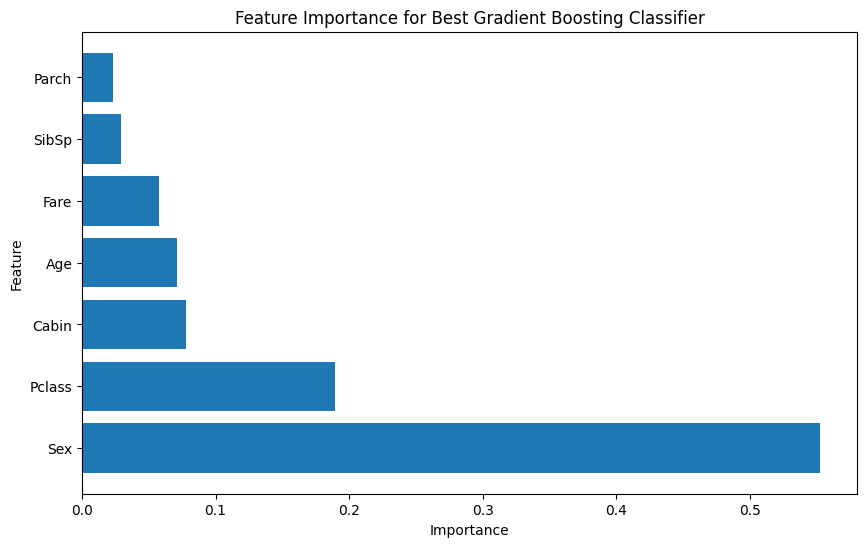

In [60]:
# Feature Importance untuk Best Gradient Boosting
feature_importances = best_gb_classifier.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Most Important Features for Best Gradient Boosting Classifier:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Best Gradient Boosting Classifier")
plt.show()